<a href="https://colab.research.google.com/github/AzzahFathinah/SDN-009-Waru/blob/master/Praktikum_Manajemen_Proyek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PRAPROSES DATA** Minggu ke 2

a. Eksplorasi Data (Exploratory Data Analysis/EDA):

Tujuan: Memahami isi dataset.
Lihat struktur data (kolom, jenis data, jumlah data).

#**week_3**

In [ ]:
# Tujuan Memahami isi dataset
# Lihat struktur data ( kolom, jenis data, jumlah data)
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/xAPI-Edu-Data.csv')
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
# Mengidentifikasi missing values dan duplikasi
print(data.isnull().sum())

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [ ]:
# penanganan missing values
# menghapus baris atau kolom yang kosong
data['Class'].fillna(data['Class'].mode()[0], inplace=True)


In [ ]:
# normalisasi data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['gender'] = encoder.fit_transform(data['gender'])
data['Class'] = encoder.fit_transform(data['Class'])

scaler = MinMaxScaler()
data[['Class', 'gender']] = scaler.fit_transform(data[['Class', 'gender']])

In [ ]:
# Mengubah kolom kategori menjadi format numerik menggunakan on-hot encoding atau label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])


In [ ]:
# Membagi data pelatihan dan pengujian menjadi 80%-20%
from sklearn.model_selection import train_test_split
X = data.drop('Class', axis=1)  # Fitur
y = data['Class']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#**Analisis Data** Minggu ke 3

In [ ]:
# Gunakan statistik deskriptif untuk mengetahui ukuran pusat (mean, median) dan penyebaran (standar deviasi, quartiles) dari fitur numerik.
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/xAPI-Edu-Data.csv')
print(data.describe())


       raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.750000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000


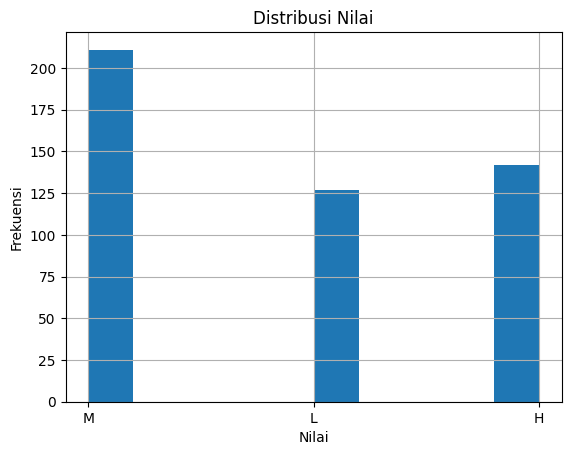

In [ ]:
# Visualisasi data
# Histogram untuk distribusi nilai numerik seperti nilai tugas atau absensi
import matplotlib.pyplot as plt
data['Class'].hist(bins=10)
plt.title('Distribusi Nilai')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()


<Axes: ylabel='Class'>

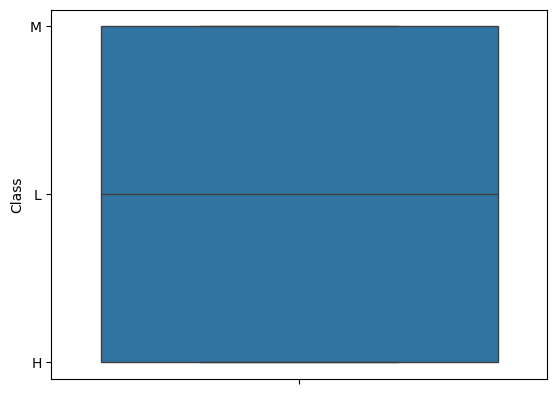

In [ ]:
# Boxplot untuk mendeteksi outlier
import seaborn as sns
sns.boxplot(data['Class'])


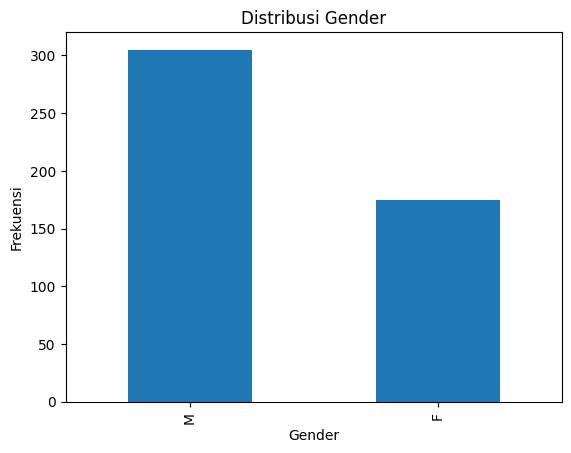

In [ ]:
# Diagram batang untuk kategori seperti jenis kelamin atau tingkat pendidikan.
data['gender'].value_counts().plot(kind='bar')
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Frekuensi')
plt.show()


In [ ]:
# Uji Kolerasi
# Menggunakan matriks korelasi untuk mengetahui hubungan antar fitur numerik.
# Pilih hanya fitur numerik untuk perhitungan korelasi
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

                   raisedhands  VisITedResources  AnnouncementsView  \
raisedhands           1.000000          0.691572           0.643918   
VisITedResources      0.691572          1.000000           0.594500   
AnnouncementsView     0.643918          0.594500           1.000000   
Discussion            0.339386          0.243292           0.417290   

                   Discussion  
raisedhands          0.339386  
VisITedResources     0.243292  
AnnouncementsView    0.417290  
Discussion           1.000000  


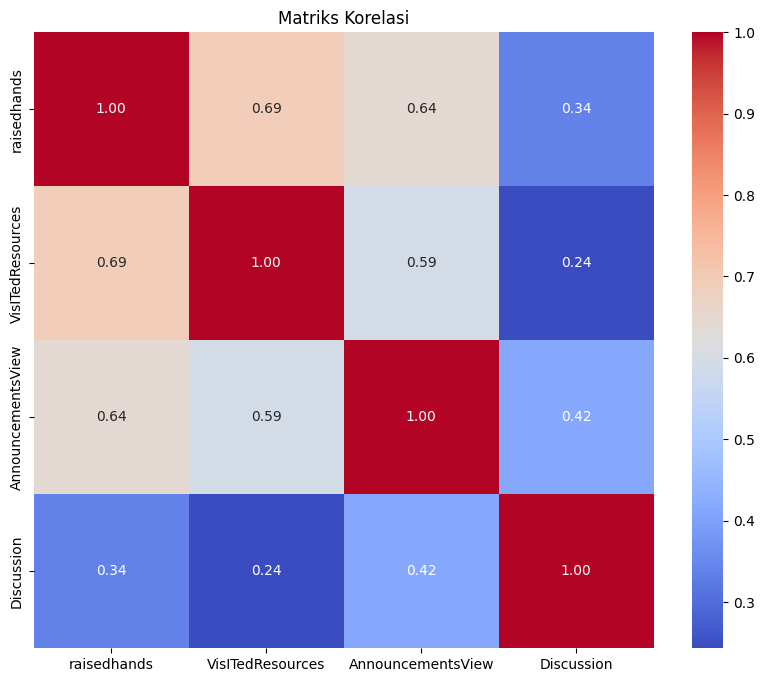

In [ ]:
# Visualisasikan matriks korelasi dengan heatmap:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()


In [ ]:
non_numeric_columns = X.select_dtypes(include=['object', 'category']).columns
print("Kolom non-numerik:", non_numeric_columns)


Kolom non-numerik: Index(['ParentschoolSatisfaction'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in non_numeric_columns:
    X[col] = label_encoder.fit_transform(X[col])


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X = data.drop('Class', axis=1)  # Fitur
y = data['Class']  # Target
# Get the list of non-numeric columns in the new X DataFrame
non_numeric_columns = X.select_dtypes(exclude=['number']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply Label Encoding to non-numeric columns in X
for col in non_numeric_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Fit the model after encoding categorical features
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)

# Menampilkan pentingnya fitur
importances = model.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                 Feature  Importance
2       VisITedResources    0.140933
1            raisedhands    0.116195
3      AnnouncementsView    0.094292
68  StudentAbsenceDays_0    0.071681
4             Discussion    0.070402
..                   ...         ...
7          NationalITy_1    0.000735
39             GradeID_2    0.000667
44             GradeID_7    0.000525
33       PlaceofBirth_13    0.000074
19        NationalITy_13    0.000067

[70 rows x 2 columns]


#**Minggu 4 Pemodelan Data**

In [ ]:
# Implementasi model LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Buat objek LabelEncoder
label_encoder = LabelEncoder()

# Terapkan Label Encoding ke kolom non-numerik di X_train dan X_test
for col in X_train.select_dtypes(exclude=['number']).columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])  # Gunakan transform untuk X_test untuk menghindari kebocoran data


# Persiapkan data untuk input LSTM
# Ubah X_train dan X_test ke float32
X_train_lstm = np.reshape(X_train.values.astype(np.float32), (X_train.shape[0], X_train.shape[1], 1))  # Ubah dimensi dan ubah tipe data
X_test_lstm = np.reshape(X_test.values.astype(np.float32), (X_test.shape[0], X_test.shape[1], 1))

# Ubah y_train dan y_test ke float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Bangun model LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))  # Untuk klasifikasi biner
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.3148 - loss: 1.8928 - val_accuracy: 0.5104 - val_loss: 0.6839
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3679 - loss: 0.7819 - val_accuracy: 0.3854 - val_loss: 0.7449
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4240 - loss: 0.7126 - val_accuracy: 0.5417 - val_loss: 0.6372
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4375 - loss: 0.6823 - val_accuracy: 0.5208 - val_loss: 0.6495
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4765 - loss: 0.6862 - val_accuracy: 0.5312 - val_loss: 0.6310
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4285 - loss: 0.6750 - val_accuracy: 0.5729 - val_loss: 0.6201
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4876 - loss: 0.6450 - val_accuracy: 0.5833 - val_loss: 0.6166
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4812 - loss: 0.6411 - val_accuracy: 0.5833 - val_loss: 0.

In [ ]:
# Implementasi Model SVM
from sklearn.svm import SVC  # Diubah dari SVR ke SVC
from sklearn.metrics import accuracy_score

# Ekstrak fitur dari LSTM
X_train_lstm_features = model.predict(X_train_lstm)
X_test_lstm_features = model.predict(X_test_lstm)

# Convert y_train to discrete classes (e.g., 0 or 1) based on a threshold
threshold = 0.5  # Choose an appropriate threshold
y_train_discrete = (y_train > threshold).astype(int)

# Latih model SVM using the discrete target
svm_model = SVC(kernel='linear')  # Anda bisa memilih kernel lain (RBF, polynomial) sesuai kebutuhan
svm_model.fit(X_train_lstm_features, y_train_discrete)
# --- Akhir perubahan ---

# Prediksi dan evaluasi model SVM
y_pred = svm_model.predict(X_test_lstm_features)
# Convert y_test to discrete classes using the same threshold
y_test_discrete = (y_test > threshold).astype(int)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
# Menggunakan confusion matrix untuk memeriksa jumlah true positives, false positives, true negatives, dan false negatives.
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test_discrete, y_pred))  # Use y_test_discrete
print(classification_report(y_test_discrete, y_pred))  # Use y_test_discrete

[[46  2]
 [38 10]]
              precision    recall  f1-score   support

           0       0.55      0.96      0.70        48
           1       0.83      0.21      0.33        48

    accuracy                           0.58        96
   macro avg       0.69      0.58      0.52        96
weighted avg       0.69      0.58      0.52        96



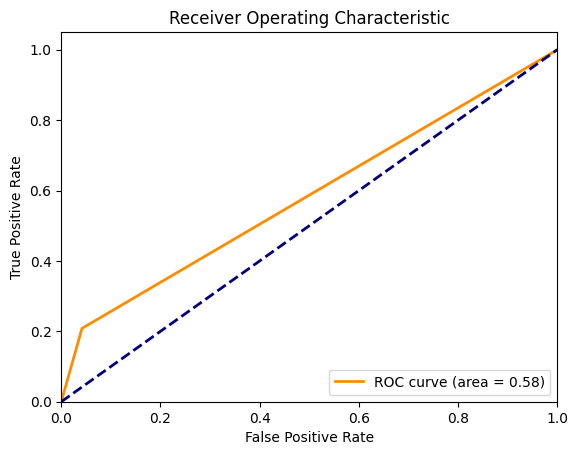

In [ ]:
# Untuk mengukur performa model klasifikasi biner, Anda bisa menggunakan ROC curve dan AUC (Area Under the Curve).
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Konversi y_pred dan y_test menjadi kelas diskrit menggunakan threshold
threshold = 0.5  # Pilih threshold yang sesuai
y_pred_discrete = (y_pred > threshold).astype(int)  # Konversi prediksi menjadi 0 atau 1
y_test_discrete = (y_test > threshold).astype(int)  # Konversi target sebenarnya menjadi 0 atau 1


fpr, tpr, thresholds = roc_curve(y_test_discrete, y_pred_discrete)  # Gunakan nilai diskrit
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#**Minggu 5 Evaluasi dan Optimasi**

In [ ]:
# Evaluasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Pastikan y_test dan y_pred memiliki tipe data yang sama (diskrit/binary)
threshold = 0.5  # Gunakan threshold yang sama seperti sebelumnya
y_pred_discrete = (y_pred > threshold).astype(int)  # Jika y_pred belum diskrit
y_test_discrete = (y_test > threshold).astype(int)  # Jika y_test belum diskrit

# Hitung metrik menggunakan y_test_discrete dan y_pred_discrete
accuracy = accuracy_score(y_test_discrete, y_pred_discrete)
precision = precision_score(y_test_discrete, y_pred_discrete)
recall = recall_score(y_test_discrete, y_pred_discrete)
f1 = f1_score(y_test_discrete, y_pred_discrete)
roc_auc = roc_auc_score(y_test_discrete, y_pred_discrete)
# --- Akhir perubahan ---

# Output metrik
print(f'Akurasi: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')

Akurasi: 0.5833
Precision: 0.8333
Recall: 0.2083
F1-Score: 0.3333
AUC-ROC: 0.5833


In [ ]:
# Optimasi model SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definisikan parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Inisialisasi model dan GridSearch
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Ubah y_train menjadi kelas diskrit (misalnya, 0 atau 1) berdasarkan threshold
threshold = 0.5  # Pilih threshold yang sesuai
y_train_discrete = (y_train > threshold).astype(int)

# Latih model dengan grid search menggunakan target diskrit
grid_search.fit(X_train_lstm_features, y_train_discrete)

# Hasil terbaik
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
# Optimasi model LSTM
from tensorflow.keras.layers import Dropout

# Bangun model LSTM dengan Dropout
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Untuk klasifikasi biner
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.4226 - loss: 0.7288 - val_accuracy: 0.5104 - val_loss: 0.6635
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4339 - loss: 0.7134 - val_accuracy: 0.5208 - val_loss: 0.6328
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4918 - loss: 0.6589 - val_accuracy: 0.5312 - val_loss: 0.6380
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4727 - loss: 0.6623 - val_accuracy: 0.5312 - val_loss: 0.6267
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4491 - loss: 0.6764 - val_accuracy: 0.5312 - val_loss: 0.6386
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4801 - loss: 0.6765 - val_accuracy: 0.5625 - val_loss: 0.6226
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4607 - loss: 0.6647 - val_accuracy: 0.5521 - val_loss: 0.6253
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4370 - loss: 0.6673 - val_accuracy: 0.5208 - val_loss: 0.

In [ ]:
# cross-validation Untuk memastikan model tidak overfitting
from sklearn.model_selection import cross_val_score

# Cross-validation untuk SVM
# Ubah y_train menjadi kelas diskrit menggunakan threshold
threshold = 0.5  # Sesuaikan jika perlu
y_train_discrete = (y_train > threshold).astype(int)

# Sekarang gunakan y_train_discrete untuk validasi silang
cv_scores = cross_val_score(best_model, X_train_lstm_features, y_train_discrete, cv=5, scoring='accuracy')
print(f'Akurasi validasi silang: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

Akurasi validasi silang: 0.6536 ± 0.0564


In [ ]:
# Evaluasi Model yang Dioptimasi
y_pred_optimized = best_model.predict(X_test_lstm_features)

# Ubah y_test ke kelas diskrit menggunakan threshold yang sama seperti yang digunakan untuk pelatihan
threshold = 0.5  # Gunakan threshold yang sama seperti sebelumnya
y_test_discrete = (y_test > threshold).astype(int)

# Sekarang hitung metrik menggunakan y_test_discrete dan y_pred_optimized
accuracy = accuracy_score(y_test_discrete, y_pred_optimized)
precision = precision_score(y_test_discrete, y_pred_optimized)
recall = recall_score(y_test_discrete, y_pred_optimized)
f1 = f1_score(y_test_discrete, y_pred_optimized)
roc_auc = roc_auc_score(y_test_discrete, y_pred_optimized)

print(f'Akurasi: {accuracy:.4f}')
print(f'Presisi: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')

Akurasi: 0.6042
Presisi: 0.6667
Recall: 0.4167
F1-Score: 0.5128
AUC-ROC: 0.6042


In [ ]:
# Penyimpanan Model
# Menyimpan model LSTM
model.save('model_lstm.h5')

# Menyimpan model SVM
import joblib
joblib.dump(best_model, 'model_svm.pkl')


['model_svm.pkl']